In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Read the CSV file with counts
df = pd.read_csv('unique_words_EN.csv')


# English

## Tone

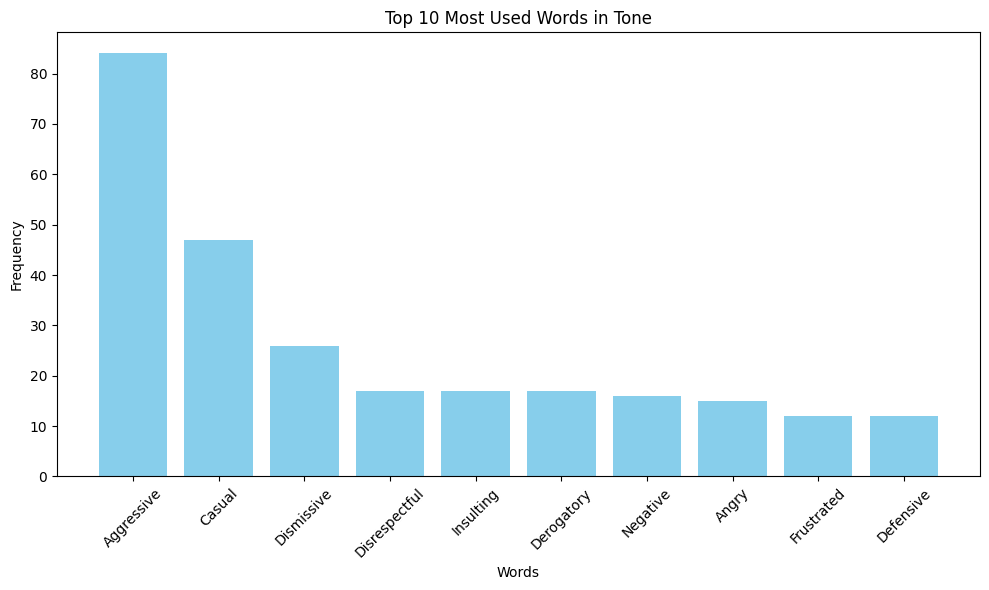

            Tone  Tone appears
0     Aggressive          84.0
1         Casual          47.0
2     Dismissive          26.0
3  Disrespectful          17.0
4      Insulting          17.0
5     Derogatory          17.0
6       Negative          16.0
7          Angry          15.0
8     Frustrated          12.0
9      Defensive          12.0


In [10]:
# Plot histogram for the 'Tone' column
tone_df = df[['Tone', 'Tone appears']].sort_values(by='Tone appears', ascending=False).head(10).reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.bar(tone_df['Tone'], tone_df['Tone appears'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Used Words in Tone')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(tone_df)

## Language

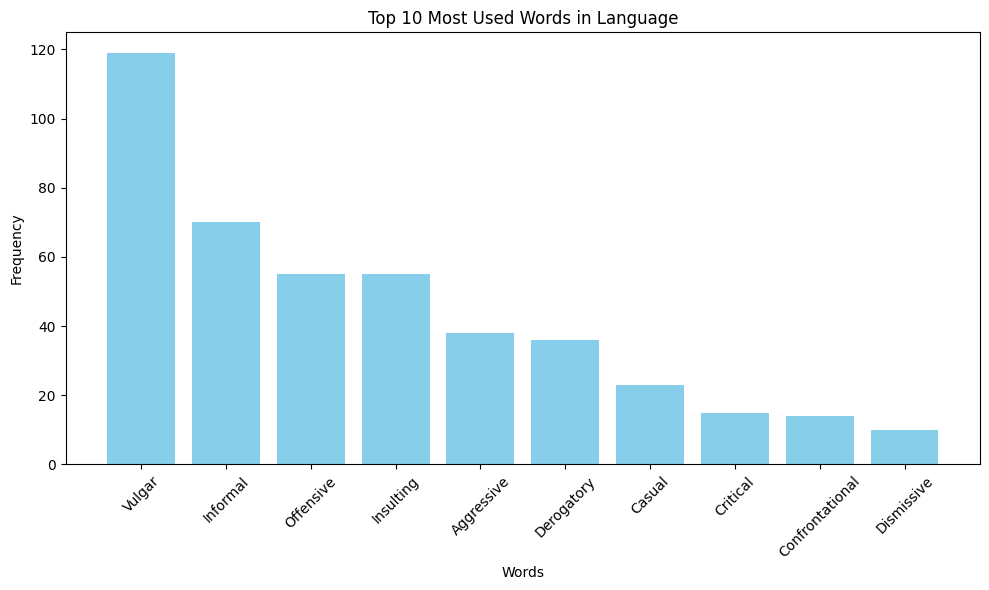

          Language  Language appears
0           Vulgar             119.0
1         Informal              70.0
2        Offensive              55.0
3        Insulting              55.0
4       Aggressive              38.0
5       Derogatory              36.0
6           Casual              23.0
7         Critical              15.0
8  Confrontational              14.0
9       Dismissive              10.0


In [11]:
# Plot histogram for the 'Language' column
language_df = df[['Language', 'Language appears']].sort_values(by='Language appears', ascending=False).head(10).reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.bar(language_df['Language'], language_df['Language appears'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Used Words in Language')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(language_df)

## Sentiment

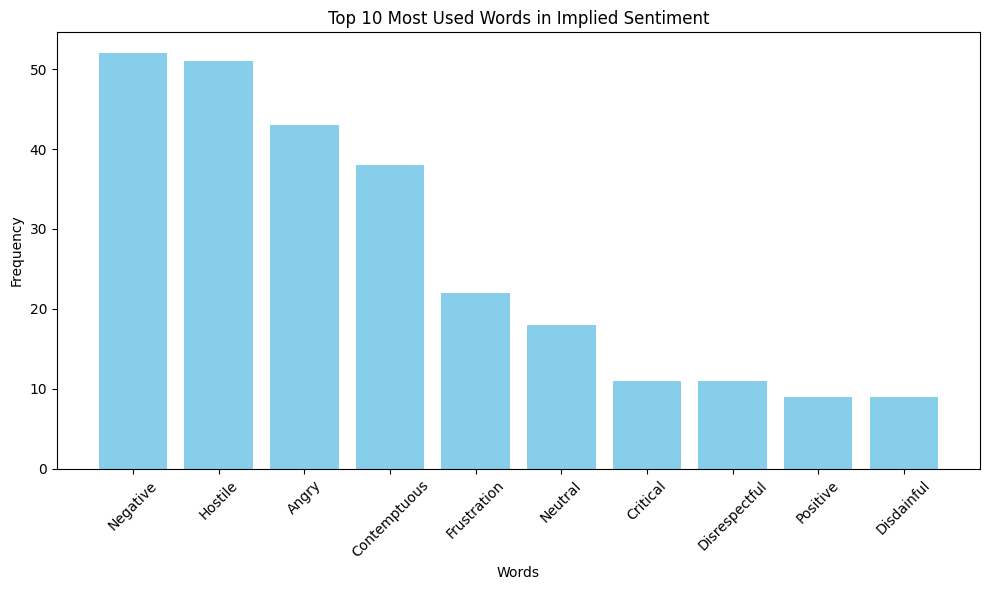

  Implied Sentiment  Implied Sentiment appears
0          Negative                       52.0
1           Hostile                       51.0
2             Angry                       43.0
3      Contemptuous                       38.0
4       Frustration                       22.0
5           Neutral                       18.0
6          Critical                       11.0
7     Disrespectful                       11.0
8          Positive                        9.0
9        Disdainful                        9.0


In [12]:
# Plot histogram for the 'Implied Sentiment' column
implied_sentiment_df = df[['Implied Sentiment', 'Implied Sentiment appears']].sort_values(by='Implied Sentiment appears', ascending=False).head(10).reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.bar(implied_sentiment_df['Implied Sentiment'], implied_sentiment_df['Implied Sentiment appears'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Used Words in Implied Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(implied_sentiment_df)

## All together

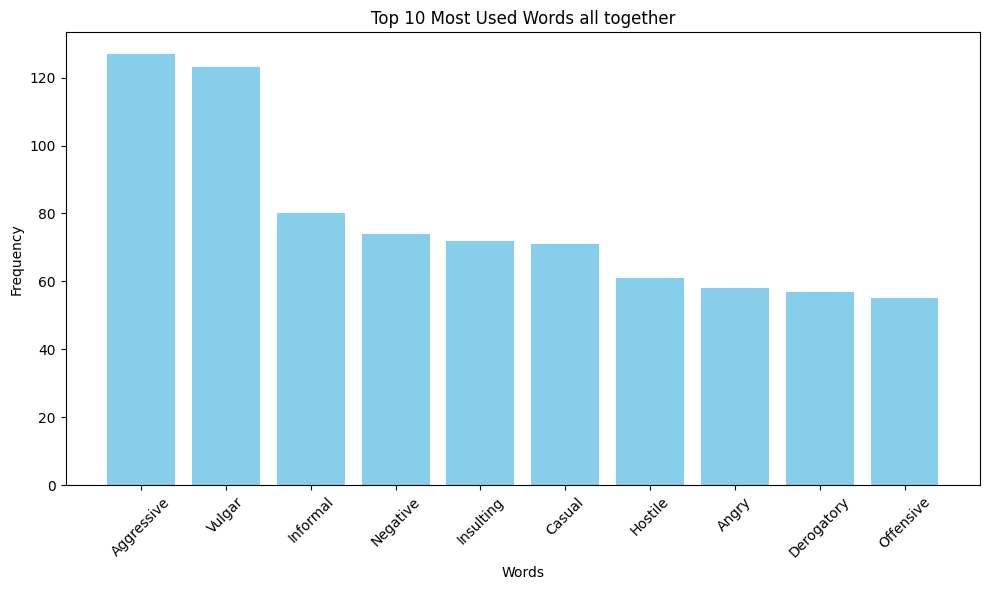

      combine  combine appears
0  Aggressive            127.0
1      Vulgar            123.0
2    Informal             80.0
3    Negative             74.0
4   Insulting             72.0
5      Casual             71.0
6     Hostile             61.0
7       Angry             58.0
8  Derogatory             57.0
9   Offensive             55.0


In [13]:
# Plot histogram for the 'Combine' column
combine_df = df[['combine', 'combine appears']].sort_values(by='combine appears', ascending=False).head(10).reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.bar(combine_df['combine'], combine_df['combine appears'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Used Words all together')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(combine_df)

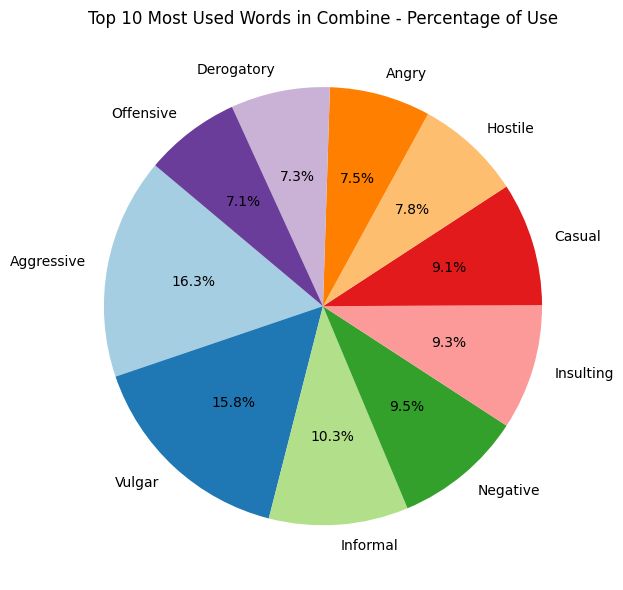

In [14]:
total_sentences = 400

# Get the top 10 most used words from the 'combine' column
combine_df = df[['combine', 'combine appears']].sort_values(by='combine appears', ascending=False).head(10).reset_index(drop=True)

# Calculate the percentage of use for each word
combine_df['percentage'] = (combine_df['combine appears'] / total_sentences) * 100

# Plot the pie chart
plt.figure(figsize=(10, 6))
plt.pie(combine_df['percentage'], labels=combine_df['combine'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 10 Most Used Words in Combine - Percentage of Use')
plt.tight_layout()
plt.show()

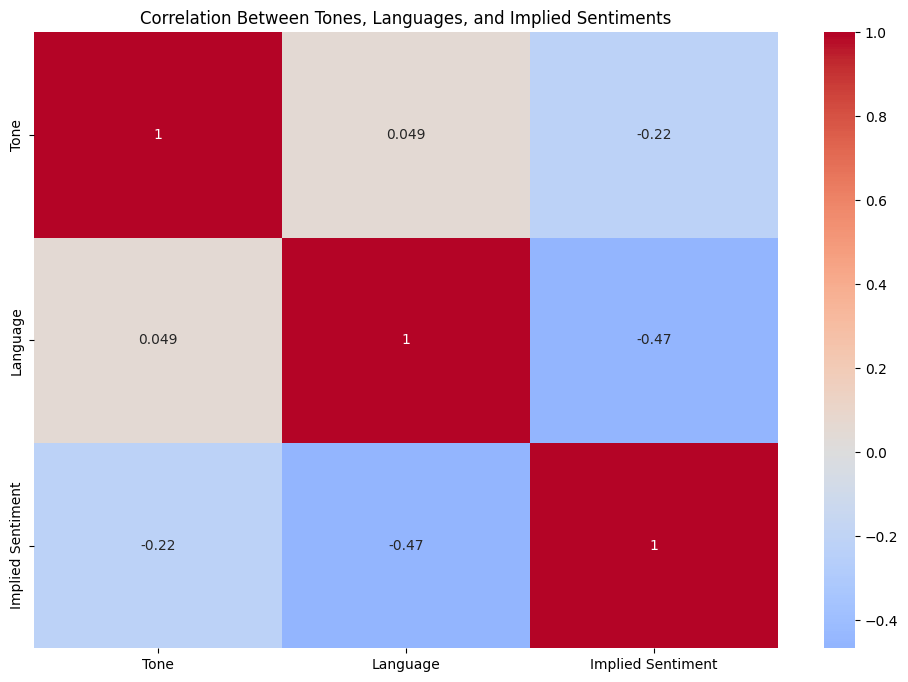

In [15]:
# Combine all data into one DataFrame for correlation analysis
combined_df = pd.DataFrame({
    'Tone': tone_df.set_index('Tone')['Tone appears'],
    'Language': language_df.set_index('Language')['Language appears'],
    'Implied Sentiment': implied_sentiment_df.set_index('Implied Sentiment')['Implied Sentiment appears']
}).fillna(0)

# Calculate the correlation matrix
correlation_matrix = combined_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Tones, Languages, and Implied Sentiments')
plt.show()